# Exploratory Data Analysis for clusterization and gene expressions

### Import Data and Information

In [ ]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.core.display import display, HTML

In [4]:
data_path = "C:/Users/henry/Desktop/python/jbook_rna/datos/Single-cell RNASeq data from Mouse Brain"
data_path2 = "C:/Users/henry/Desktop/python/jbook_rna/datos/Theory - Intro to single-cell RNAseq Images"

In [ ]:
glioblastoma_norm_file = os.path.join(data_path, "glioblastoma_normalized.h5ad")
glioblastoma_raw_file = os.path.join(data_path, "glioblastoma_raw.h5ad")
pbmc3k_file = os.path.join(data_path, "pbmc3k.h5ad")

adata_glioblastoma_norm = sc.read_h5ad(glioblastoma_norm_file)
adata_glioblastoma_raw = sc.read_h5ad(glioblastoma_raw_file)
adata_pbmc3k = sc.read_h5ad(pbmc3k_file)

### adata_pbmc3k

This dataset contains information about gene expression in peripheral blood mononuclear cells (PBMC). Each row represents a gene, and the columns contain statistics about its expression across different cells.


### 🔍 Variables in the dataset

| **Variable**             | **Description** |
|------------------------|-------------|
| `gene_ids`        | Unique gene identifier in Ensembl format (`ENSGxxxxxxxxxxx`). |
| `n_cells_by_counts` | Number of cells in which the gene was detected. |
| `mean_counts`      | Mean expression value of the gene across all cells. |
| `log1p_mean_counts` | Log-transformed (`log1p`) mean expression of the gene. |
| `pct_dropout_by_counts` | Percentage of cells where the gene was not expressed (`dropout`). |
| `total_counts`     | Total sum of expression values for the gene across all cells. |
| `log1p_total_counts` | Log-transformed (`log1p`) total expression count. |
| `n_cells`         | Total number of cells in which gene expression was measured. |
| `highly_variable` | Indicates whether the gene is highly variable (`True/False`), useful for feature selection. |
| `means`          | Mean gene expression in the sample, without log transformation. |
| `dispersions`     | Dispersion of the gene expression across all cells. |
| `dispersions_norm` | Normalized dispersion of the gene, adjusted by the mean. |


In [ ]:
adata_pbmc3k.var.head()

,gene_ids,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
index,,,,,,,,,,,,
TNFRSF4,ENSG00000186827,155,0.077407,0.074558,94.259259,209.0,5.347107,155,True,0.277410,2.086050,0.665406
CPSF3L,ENSG00000127054,202,0.094815,0.090585,92.518519,256.0,5.549076,202,True,0.385194,4.506988,2.955005
ATAD3C,ENSG00000215915,9,0.009259,0.009217,99.666667,25.0,3.258096,9,True,0.038252,3.953486,4.352607
C1orf86,ENSG00000162585,501,0.227778,0.205206,81.444444,615.0,6.423247,501,True,0.678283,2.713521,0.543182
RER1,ENSG00000157916,608,0.298148,0.260939,77.481481,805.0,6.692084,608,True,0.814813,3.447533,1.582528


### 🔍 Variables in the dataset

| **Variable**                         | **Description** |
|--------------------------------------|-------------|
| `n_genes_by_counts`            | Number of genes detected in the cell. |
| `log1p_n_genes_by_counts`      | Log-transformed (`log1p`) number of detected genes. |
| `total_counts`                 | Total number of RNA molecule counts detected in the cell. |
| `log1p_total_counts`           | Log-transformed (`log1p`) total RNA counts. |
| `pct_counts_in_top_50_genes`   | Percentage of total RNA counts contributed by the **top 50 most expressed genes** in the cell. |
| `pct_counts_in_top_100_genes`  | Percentage of total RNA counts contributed by the **top 100 most expressed genes** in the cell. |
| `pct_counts_in_top_200_genes`  | Percentage of total RNA counts contributed by the **top 200 most expressed genes** in the cell. |
| `pct_counts_in_top_500_genes`  | Percentage of total RNA counts contributed by the **top 500 most expressed genes** in the cell. |
| `n_genes`                     | Number of genes detected in the cell (**alternative representation of `n_genes_by_counts`**). |
| `percent_mito`                | Percentage of mitochondrial gene expression out of the total RNA counts (**used to assess cell quality**). |
| `n_counts`                    | Total number of UMI (Unique Molecular Identifiers) counts per cell (**alternative representation of `total_counts`**). |
| `louvain`                     | Cluster assignment using the **Louvain community detection algorithm** (unsupervised clustering). |
| `leiden`                      | Cluster assignment using the **Leiden clustering algorithm**, another method for detecting groups of similar cells. |


In [ ]:
adata_pbmc3k.obs.head()

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_genes,percent_mito,n_counts,louvain,leiden
index,,,,,,,,,,,,,
AAACATACAACCAC-1,781,6.661855,2421.0,7.792349,47.748864,63.279637,74.969021,88.393226,781,0.030178,2419.0,0,0
AAACATTGAGCTAC-1,1352,7.210080,4903.0,8.497807,45.502753,61.023863,71.813176,82.622884,1352,0.037936,4903.0,2,2
AAACATTGATCAGC-1,1131,7.031741,3149.0,8.055158,41.314703,53.794856,65.449349,79.961893,1131,0.008897,3147.0,0,0
AAACCGTGCTTCCG-1,960,6.867974,2639.0,7.878534,39.029936,52.898825,66.691929,82.569155,960,0.017431,2639.0,1,1
AAACCGTGTATGCG-1,522,6.259581,981.0,6.889591,44.852192,55.657492,67.176351,97.757390,522,0.012245,980.0,4,4


### Total RNA Counts vs. Mitochondrial Percentage
High mitochondrial content may indicate stressed or dying cells.

1. **Dense Cluster Around Low Total Counts**  
   - The majority of data points are concentrated around **total counts between 1000 and 4000**.
   - The mitochondrial percentage in this range is **mostly between 1% and 4%**.

2. **Increase in Variability at Higher Total Counts**  
   - As `total_counts` increases beyond **4000**, there is **greater variability** in mitochondrial percentage.
   - Some cells have **higher mitochondrial percentages (~5%)**, but most stay below this level.

3. **No Strong Correlation**  
   - The points are widely scattered, indicating **no clear linear relationship** between total counts and mitochondrial percentage.
   - This suggests that mitochondrial gene expression is not strictly dependent on total RNA counts but may be influenced by other biological or technical factors.


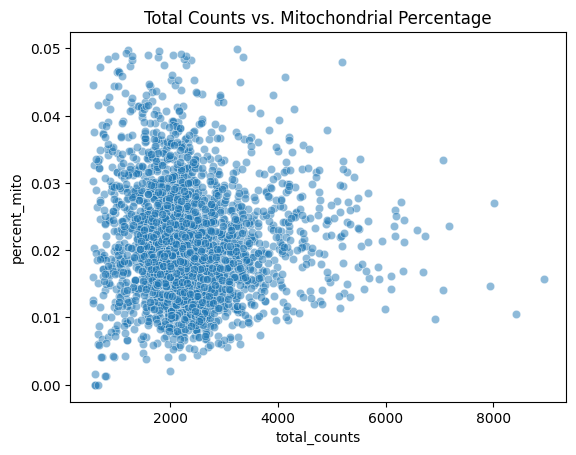

In [9]:
sns.scatterplot(data=adata_pbmc3k.obs, x="total_counts", y="percent_mito", alpha=0.5)
plt.title("Total Counts vs. Mitochondrial Percentage")
plt.show()


### Number of Genes Detected vs. Mitochondrial Percentage
1. **Dense Cluster Around 500-1000 Genes**  
   - Most cells have detected **between 500 and 1000 genes**.
   - The mitochondrial percentage in this range **varies between 1% and 4%**, with some outliers reaching **above 5%**.

2. **Increase in Variability for Higher Gene Counts**  
   - As `n_genes_by_counts` increases beyond **1500**, the variability in mitochondrial percentage expands.
   - Some cells with **>2000 detected genes** have **very low mitochondrial percentages**, while others have higher values.

3. **No Strong Correlation**  
   - The scatter of points suggests **no clear linear trend** between the number of detected genes and mitochondrial gene expression.
   - A weak trend may indicate that cells with fewer detected genes tend to have slightly higher mitochondrial percentages, which could be an indicator of low-quality or stressed cells.

- **Cells with lower detected genes and higher mitochondrial content** might represent **stressed or dying cells** with degraded cytoplasmic RNA.
- **No strong correlation** exists, though cells with very low gene detection may show slightly elevated mitochondrial expression.



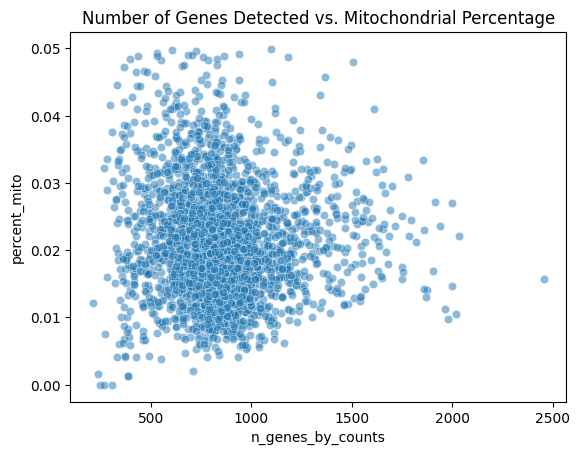

In [10]:
sns.scatterplot(data=adata_pbmc3k.obs, x="n_genes_by_counts", y="percent_mito", alpha=0.5)
plt.title("Number of Genes Detected vs. Mitochondrial Percentage")
plt.show()


### Violin Plot of Total Gene Counts by Clusters (louvain)

- **Clusters with higher total RNA counts (e.g., Cluster 6)** may represent **highly transcriptionally active cells** or certain cell types with more RNA content.
- **Clusters with lower RNA counts (e.g., Cluster 7)** might include **low-quality cells, stressed cells, or specific cell types with inherently low RNA expression**.
- **Outliers with extreme RNA counts** should be examined further to determine whether they are biologically meaningful or artifacts of data collection.


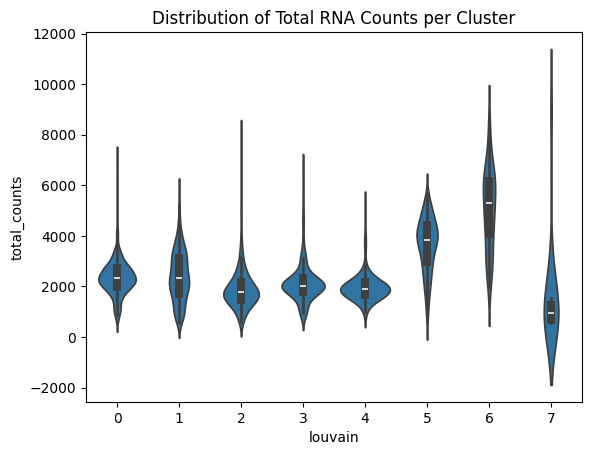

In [11]:
sns.violinplot(data=adata_pbmc3k.obs, x="louvain", y="total_counts")
plt.title("Distribution of Total RNA Counts per Cluster")
plt.show()


### Gene xpression per cluster

   - Clusters **1, 4, 5, and 6 show greater dispersion** in the number of expressed genes, indicating **heterogeneity in transcriptional activity** within these groups.
   - The presence of **outliers** (points outside the whiskers of the box) in all clusters suggests the existence of some cells with a number of expressed genes **significantly higher or lower than the majority**.

   - There are notable differences in the number of expressed genes between clusters, indicating **cellular heterogeneity**.
   - **Cluster 6 has the greatest diversity of gene expression**, while **Cluster 7 has the least**.
   - It is advisable to conduct further analysis to determine if the **clusters with a low number of expressed genes contain viable cells or if they represent experimental artifacts**.


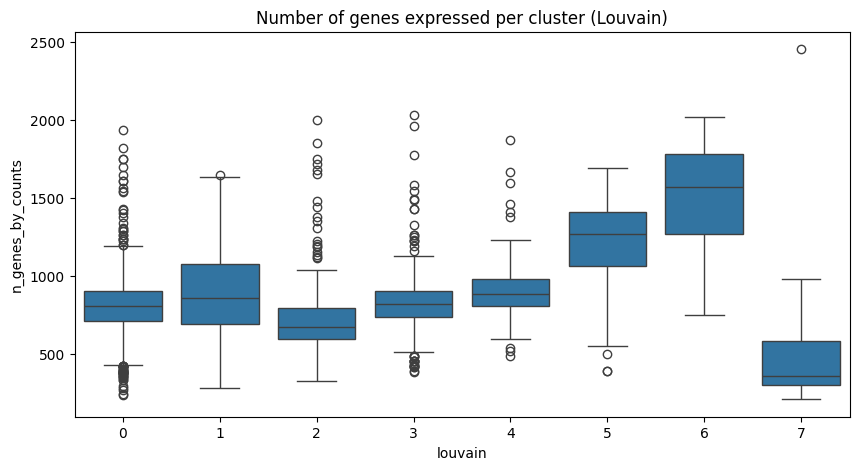

In [40]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="louvain", y="n_genes_by_counts", data=adata_pbmc3k.obs)
plt.title("Number of genes expressed per cluster (Louvain)")
plt.show()


### Correlation matrix

**Weak negative correlation between `percent_mito` and other variables (`r ≈ -0.04`)**:
   - Total number of genes or the total amount of RNA in the cell.
   - A value close to zero suggests that **differences in mitochondrial expression are not strongly linked to the total amount of detected genetic material**.

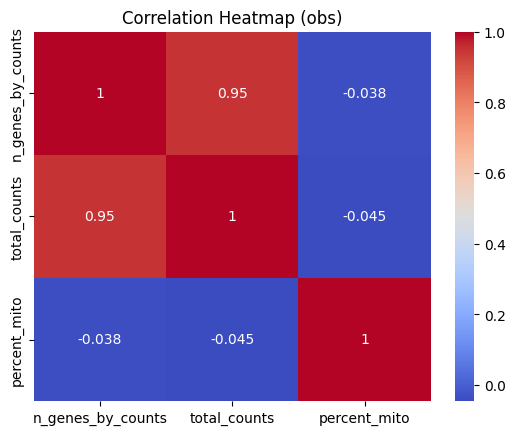

In [12]:
corr_matrix = adata_pbmc3k.obs[["n_genes_by_counts", "total_counts", "percent_mito"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (obs)")
plt.show()


### Genes vs. Mean Expression



The plot shows a negative correlation between expression level and variability, influenced by dropout effects, biological heterogeneity, and overdispersion. 

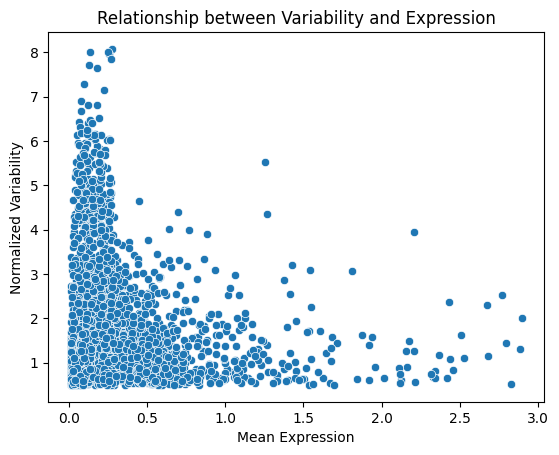

In [43]:
sns.scatterplot(data=adata_pbmc3k.var, x="means", y="dispersions_norm")
plt.xlabel("Mean Expression")
plt.ylabel("Normalized Variability")
plt.title("Relationship between Variability and Expression")
plt.show()

### Percentage Dropout vs. Mean Counts
Higher dropout (zero expression in many cells) means a gene is detected in fewer cells. This plot highlights the dropout effect in scRNA-seq and suggests that lowly expressed genes should be interpreted cautiously due to potential detection bias.


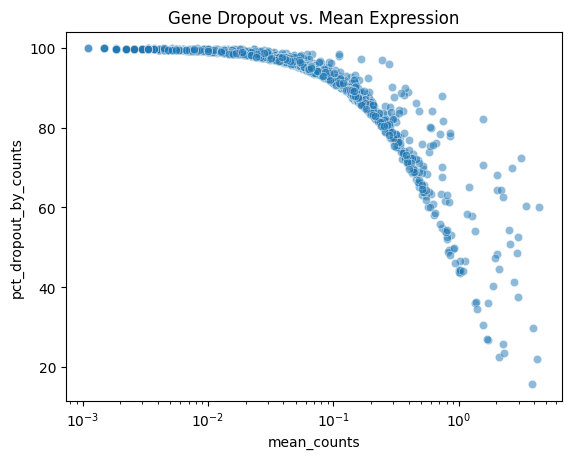

In [13]:
sns.scatterplot(data=adata_pbmc3k.var, x="mean_counts", y="pct_dropout_by_counts", alpha=0.5)
plt.xscale("log")
plt.title("Gene Dropout vs. Mean Expression")
plt.show()


### Distribution of more expressed genes per cluster

- Cluster 7 exhibits a much wider spread, with some cells having over 70% of their total counts coming from the top 50 genes, indicating a stronger dominance of a few genes in these cells.
- Most clusters have a percentage of counts concentrated around 40-50%, suggesting that a significant proportion of gene expression is dominated by a few highly expressed genes.

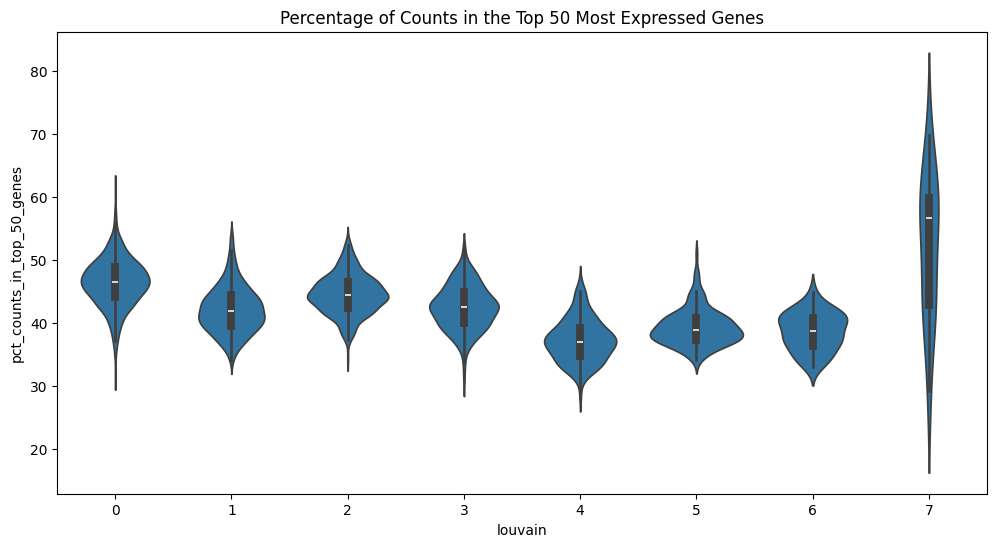

In [41]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=adata_pbmc3k.obs, x="louvain", y="pct_counts_in_top_50_genes")
plt.title("Percentage of Counts in the Top 50 Most Expressed Genes")
plt.show()


### Expression of a Specific Gene Across Clusters
Choose a highly variable gene, e.g., "TNFRSF4", and plot its expression:

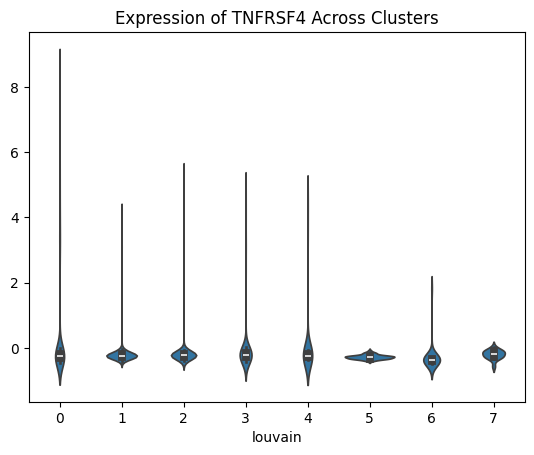

In [14]:
gene = "TNFRSF4"
sns.violinplot(data=adata_pbmc3k.obs, x="louvain", y=adata_pbmc3k[:, gene].X.toarray().flatten())
plt.title(f"Expression of {gene} Across Clusters")
plt.show()


- Cluster 0 exhibits the widest range of expression values, with some cells showing high expression levels (outliers).
- Most clusters (e.g., 1, 2, 3, 4, 5, 6, 7) display narrow violins, suggesting a concentration of cells with little to no TNFRSF4 expression.- cluster 5 has a more defined peak with a slightly higher baseline expression, suggesting more consistent expression levels within the cluster.

This plot suggests that TNFRSF4 is highly specific to a subpopulation of cells and shows a potential inverse trend with total RNA content.

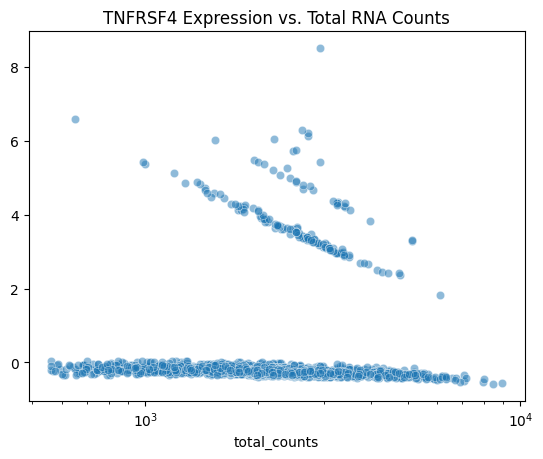

In [15]:
gene = "TNFRSF4"
sns.scatterplot(x=adata_pbmc3k.obs["total_counts"], y=adata_pbmc3k[:, gene].X.toarray().flatten(), alpha=0.5)
plt.xscale("log")
plt.title(f"{gene} Expression vs. Total RNA Counts")
plt.show()


### Clusterization

**Biological Insights**
- The **distinct clustering** of neoplastic cells supports the notion of **tumor heterogeneity**, where multiple subpopulations of cancer cells can exist.
- A **large immune cell cluster** may indicate **immune infiltration** within the tumor microenvironment.
- The **presence of astrocytes, OPCs, oligodendrocytes, and neurons** reflects the **glioblastoma’s origin** in the central nervous system and the **diverse cell types** typically found in brain tissue.


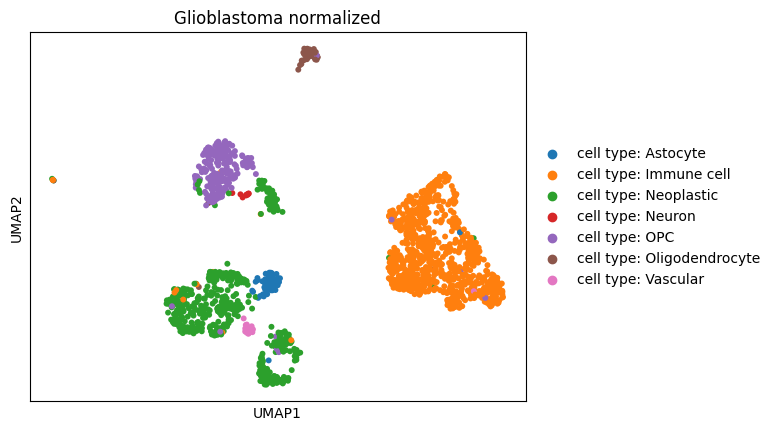

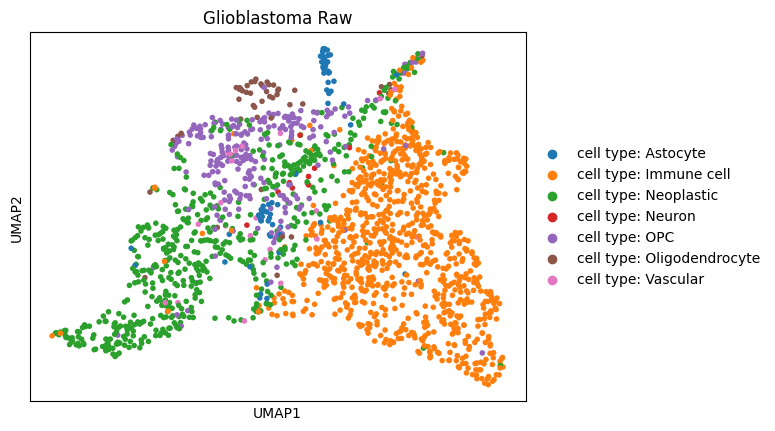

In [ ]:
for adata, name in zip(
    [adata_glioblastoma_norm, adata_glioblastoma_raw, adata_pbmc3k], 
    ["Glioblastoma normalized", "Glioblastoma Raw"]
):
    sc.pp.neighbors(adata)  
    sc.tl.umap(adata)        
    sc.pl.umap(adata, color="cell_type", title=name)  #  UMAP


### 🔍 Interpretation

- Each point represents an individual cell in the dataset.  
- The position in the UMAP space reflects the similarity between cells:  
  - **Nearby cells** have similar gene expression profiles.  
  - **Distant cells** represent different cell populations.  
- **Color indicates TNFRSF4 gene expression**:  
  - **Purple (low or 0 values)** → Cells that do not express TNFRSF4.  
  - **Green/Yellow (high values)** → Cells with higher TNFRSF4 expression.  
- **Biological interpretation**:  
  - If TNFRSF4 is expressed only in certain regions, it indicates activity in **specific subpopulations**.  
  - If it is uniformly distributed, it suggests **general expression across all cells**.  


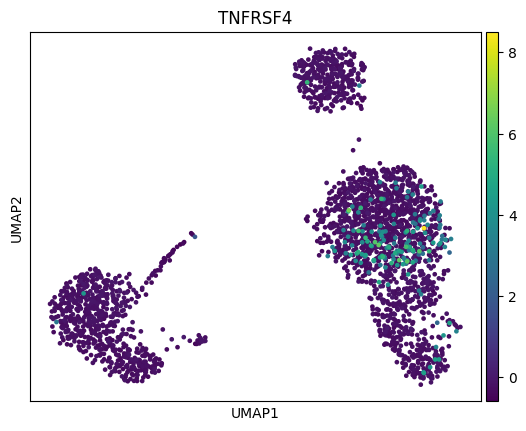

In [16]:
sc.pp.pca(adata_pbmc3k)
sc.pp.neighbors(adata_pbmc3k)
sc.tl.umap(adata_pbmc3k)
sc.pl.umap(adata_pbmc3k, color=["TNFRSF4"])


**Cell Count Distribution Across Clusters**

The following table shows the number of cells in each Louvain cluster:

| Cluster | Cell Count | Description |
|---------|-----------|-------------|
| **0**   | **1153**  | Largest population, dominant cell type |
| **1**   | **480**   | Second-largest group, possibly another major type |
| **2**   | **341**   | Medium-sized cluster, functionally distinct cells |
| **3**   | **303**   | Similar to cluster 2, moderate presence |
| **4**   | **157**   | Smaller subpopulation, possibly a rare cell type |
| **5**   | **153**   | Another small population, might indicate transition states |
| **6**   | **36**    | Very small cluster, could be rare or outlier cells |
| **7**   | **15**    | Smallest group, possibly noise or rarest cell type |

### **Observations**
- **Cluster 0 dominates**, suggesting a highly abundant cell type.
- **Smaller clusters (6 & 7)** may represent rare populations or technical artifacts.
- The distribution follows a common biological trend: **a few large clusters and several smaller specialized groups**.


In [25]:
adata_pbmc3k.obs.groupby("louvain").size()


C:\Users\henry\AppData\Local\Temp\ipykernel_4840\2660952902.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_pbmc3k.obs.groupby("louvain").size()


louvain
0    1153
1     480
2     341
3     303
4     157
5     153
6      36
7      15
dtype: int64

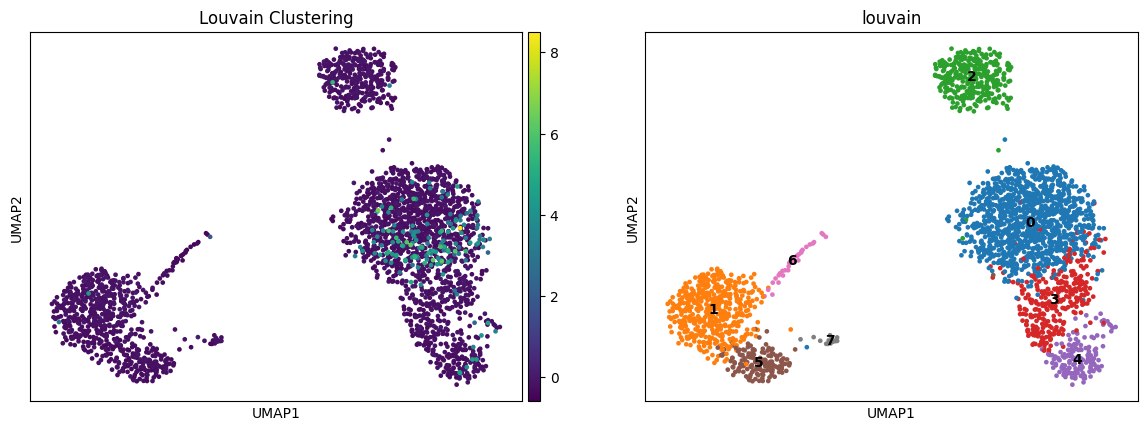

In [39]:
sc.pl.umap(adata_pbmc3k, color=["TNFRSF4","louvain"], legend_loc="on data", title="Louvain Clustering",)